In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import wavesim_functions as wave 

In [2]:
np.random.seed(1234)

In [3]:
hs = 10
tp = 12
depth = 100
cond = False
a = 0

In [4]:
num_sea_states = 2000
sea_state_hours = 1
period = 60**2 * sea_state_hours  # total time range in seconds
waves_per_state = 60**2/tp

In [5]:
z_num = 150
z_range = np.linspace(-depth, 50, z_num)
z = z_range[1] - z_range[0]

In [6]:

freq = 1.00  # number of sample points per second

nT = np.floor(period*freq)  # number of time points to evaluate
t_num = int(nT)  # to work with rest of the code

dt = 1/freq  # time step is determined by frequency
t_range = np.linspace(-nT/2, nT/2 - 1, int(nT)) * dt  # centering time around 0

f_range = np.linspace(1e-3, nT - 1, int(nT)) / (nT / freq)  # selecting frequency range from 0 to freq
om_range = f_range * (2*np.pi)

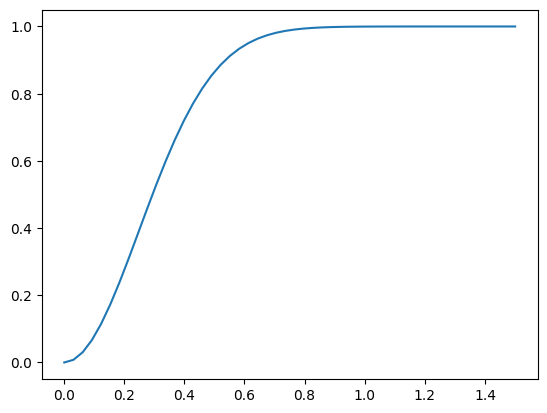

In [7]:
# plotting crest cdf
CoH = np.linspace(1e-3, 1.5)
crest_cdf = wave.rayleigh_cdf(CoH * hs, hs)

plt.figure()
plt.plot(CoH, crest_cdf)
plt.show()

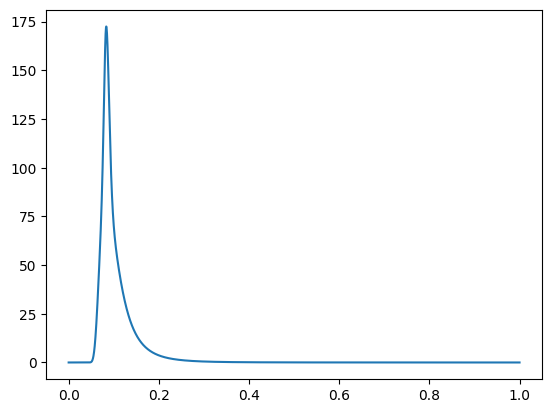

In [8]:
# get jonswap densities
jnswp_dens = wave.djonswap(f_range, hs, tp)

plt.figure()
plt.plot(f_range, jnswp_dens)

In [9]:
# max_crests = np.ndarray(num_sea_states)
# for i in range(num_sea_states):
#     eta_fft, u_x_fft, u_z_fft, du_x_fft, du_z_fft = wave.fft_random_wave_sim(z_range, depth, a, om_range, jnswp_dens, cond)
#     max_crests[i] = np.max(eta_fft[0])
#     print(i)
    
# np.savetxt('max_crests.txt', max_crests, delimiter=',') 

In [10]:
max_crests = np.loadtxt('max_crests.txt')
max_crests

array([ 9.8243031 , 11.98514091,  8.21889029, ...,  8.16492673,
        8.88171411,  9.77035042])

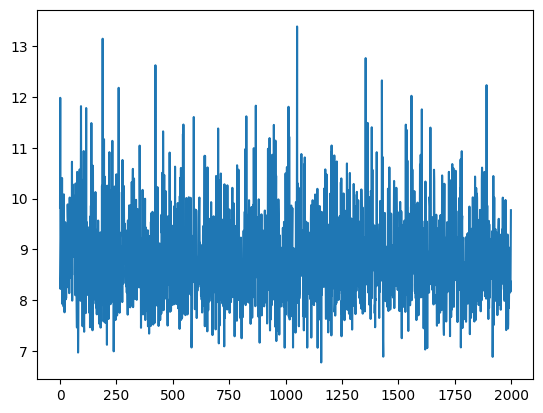

In [11]:
plt.figure()
plt.plot(max_crests)
plt.show()

In [12]:
emp = np.ndarray(len(CoH))
for i_c, c in enumerate(CoH):
    emp[i_c] = sum(c*hs > max_crests)/num_sea_states

In [15]:
true = crest_cdf**waves_per_state

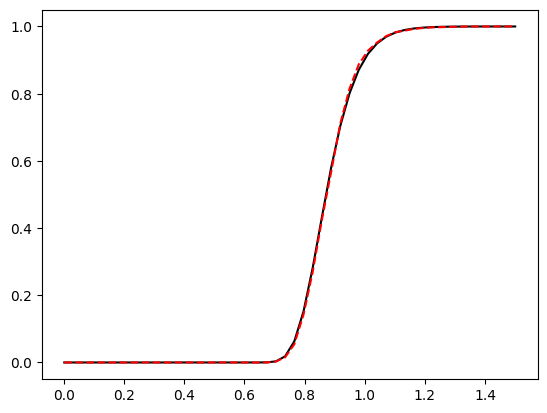

In [18]:
plt.figure()
plt.plot(CoH, true, '-k')
plt.plot(CoH, emp, '--r')
plt.show()